In [2]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM, Flatten
from keras.layers import ConvLSTM2D
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("Crude-Oil_160101-221213.csv", index_col = "Date", parse_dates = True)
df.drop(df.columns[[0,1,2,4,5]], axis=1, inplace=True)
df.tail()

,Close
Date,
2022-12-06,74.25
2022-12-07,72.01
2022-12-08,71.46
2022-12-09,71.02
2022-12-12,73.17


In [4]:
len(df)

1749

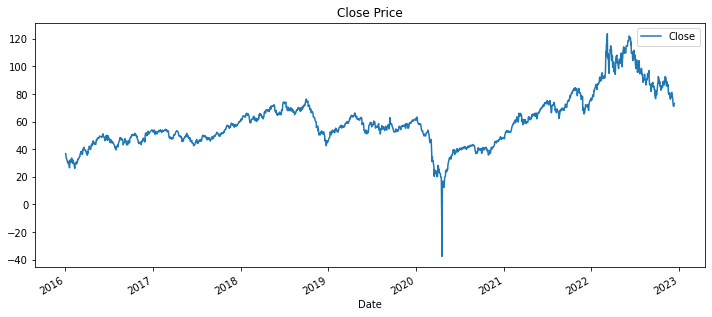

In [7]:
#Visualize the close price data
df.plot(y = 'Close', figsize = (12,5), title = 'Close Price')

In [8]:
dataset = df.values
sc = MinMaxScaler(feature_range = (0,1))
data_scaled = sc.fit_transform(dataset)

In [9]:
#Defining train data sizes
train_size = int(np.ceil(len(dataset) * 0.9))
train = data_scaled[0:int(train_size),:]
len(train)

1575

In [10]:
train

array([[0.46110457],
       [0.45620777],
       [0.44381082],
       ...,
       [0.84857125],
       [0.87342714],
       [0.86524515]])

In [11]:
#Split the data into x_train & y_train data sets
x_train = []
y_train = []

for i in range (60, len(train)):
  x_train.append(train[i - 60:i, 0]) 
  y_train.append(train[i, 0]) 
  if i <= 61:
    print(x_train)
    print(y_train)
    print()
    #Convert the x_train & y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.46110457, 0.45620777, 0.44381082, 0.43947189, 0.43879006,
       0.42794273, 0.42193021, 0.42217814, 0.42664105, 0.41560776,
       0.40965722, 0.39781814, 0.41628959, 0.43277754, 0.42131036,
       0.42819067, 0.43345937, 0.43916197, 0.44164136, 0.42924441,
       0.41845906, 0.4333354 , 0.42986425, 0.42471952, 0.41728135,
       0.40643402, 0.40339676, 0.39571066, 0.41573173, 0.41325234,
       0.42329387, 0.4239757 , 0.41697143, 0.42837662, 0.43079402,
       0.4325296 , 0.43823219, 0.43643464, 0.44244716, 0.44647617,
       0.44808777, 0.44752991, 0.45589785, 0.46817083, 0.45949296,
       0.47058824, 0.46779892, 0.47188992, 0.46370793, 0.45850121,
       0.47164198, 0.48242732, 0.47771648, 0.48062977, 0.49017542,
       0.47988595, 0.47784045, 0.47740656, 0.47052625, 0.47077419])]
[0.47089815905287297]

[array([0.46110457, 0.45620777, 0.44381082, 0.43947189, 0.43879006,
       0.42794273, 0.42193021, 0.42217814, 0.42664105, 0.41560776,
       0.40965722, 0.39781814, 0.41

In [12]:
model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dropout(0.5))
model.add(Dense(1))

#Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')
#Train the model
model.fit(x_train, y_train, batch_size = 30, epochs = 100)

Epoch 1/100
51/51 [==============================] - 11s 122ms/step - loss: 0.0263
Epoch 2/100
51/51 [==============================] - 6s 118ms/step - loss: 0.0080
Epoch 3/100
51/51 [==============================] - 6s 118ms/step - loss: 0.0073
Epoch 4/100
51/51 [==============================] - 6s 120ms/step - loss: 0.0070
Epoch 5/100
51/51 [==============================] - 6s 118ms/step - loss: 0.0069
Epoch 6/100
51/51 [==============================] - 6s 114ms/step - loss: 0.0060
Epoch 7/100
51/51 [==============================] - 6s 121ms/step - loss: 0.0061
Epoch 8/100
51/51 [==============================] - 6s 120ms/step - loss: 0.0056
Epoch 9/100
51/51 [==============================] - 6s 120ms/step - loss: 0.0053
Epoch 10/100
51/51 [==============================] - 6s 123ms/step - loss: 0.0055
Epoch 11/100
51/51 [==============================] - 7s 132ms/step - loss: 0.0052
Epoch 12/100
51/51 [==============================] - 7s 145ms/step - loss: 0.0044
Epoch 13/100

In [13]:
test = data_scaled[train_size - 60: , :]
#Create a data x_test & y_test
x_test = []
y_test = dataset[train_size: , :]
for i in range(60, len(test)):
  x_test.append(test[i - 60:i, 0])

#Convert the data to a numpy array
x_test = np.array(x_test)

#Reshape data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#Get the models predicted price values
predictions = model.predict(x_test)
predictions = sc.inverse_transform(predictions)

6/6 [==============================] - 1s 38ms/step


In [14]:
#RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE: ", rmse)
#MAPE
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print("MAPE: ", mape)

RMSE:  3.331662929047485
MAPE:  2.88917676948661


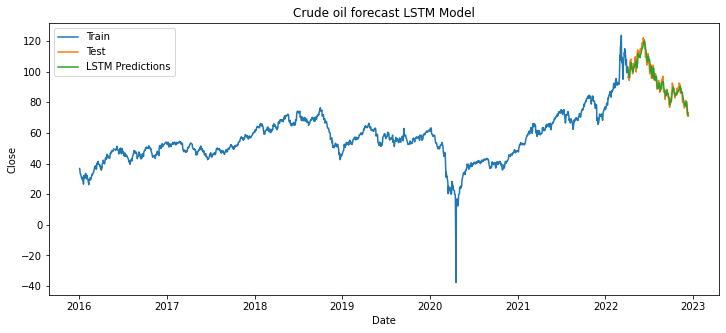

In [16]:
pd.options.mode.chained_assignment = None 
#Plot the data
train_ = df[:train_size]
test_ =  df[train_size:]
test_['Predictions'] = predictions
#Visualisze the data
plt.figure(figsize = (12,5))
plt.title("Crude oil forecast LSTM Model")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(train_['Close'])
plt.plot(test_[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'LSTM Predictions'], loc = 'upper left')
plt.show()